## What is time series

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.   
https://en.wikipedia.org/wiki/Time_series

**Univariate time series:** Only one variable is varying over time. For example, data collected from a sensor measuring the temperature of a room every second. Therefore, each second, you will only have a one-dimensional value, which is the temperature.

**Multivariate time series:** Multiple variables are varying over time. For example, a tri-axial accelerometer. There are three accelerations, one for each axis (x,y,z) and they vary simultaneously over time.

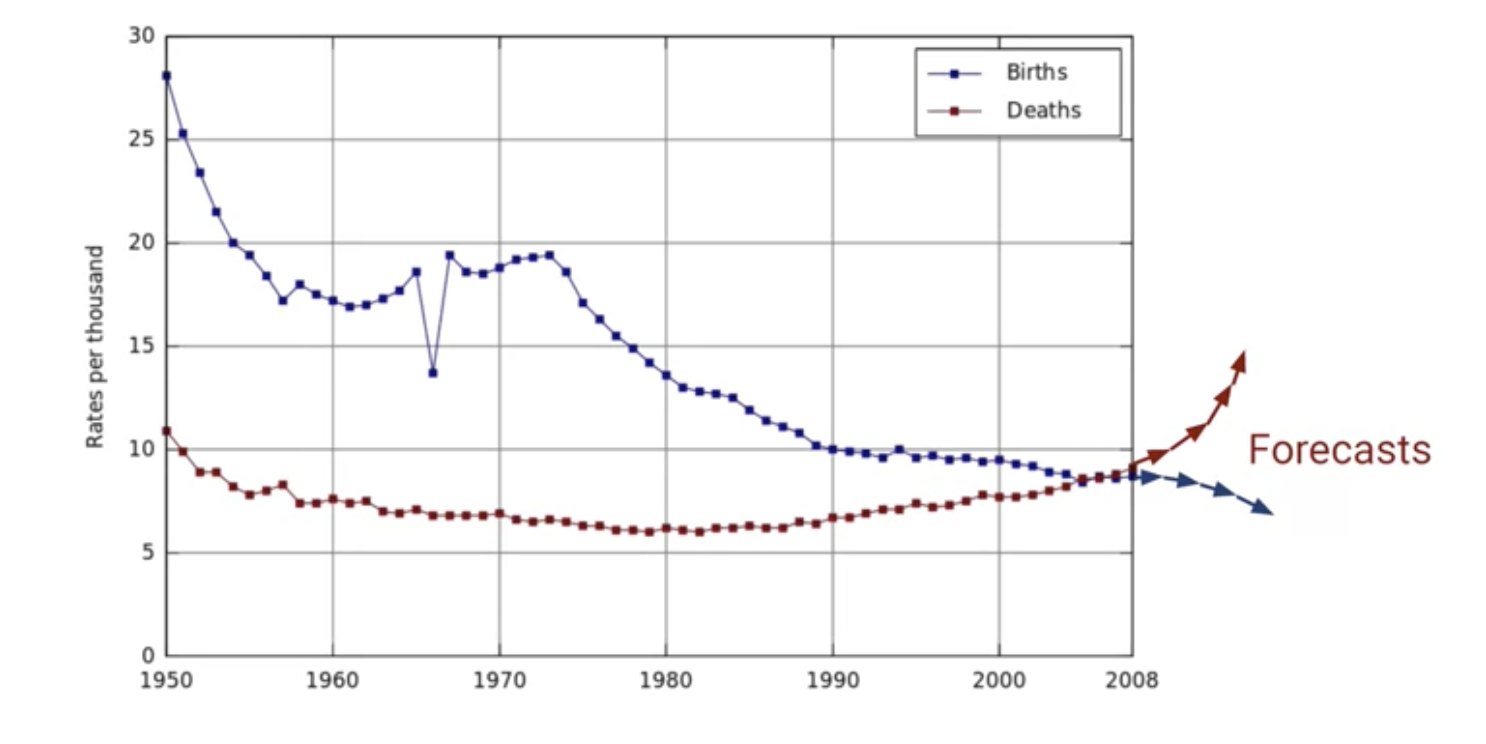

### Comman patterns in Time Series

##### Trend
It could be upward or downward trend

##### Seasonality 
Patterns repeating at regular intervals

##### White Noise

##### Auto correleation TIme Series
No trend or Seasonality

Normally Time series with real data consists of all the four 
##### Trend + Seasonality + Noise + Auto Correlation

UHG Stock price data 
![image.png](./image/UHGStock.png)

No trend or Seasonality
![image.png](./image/NonStationaryTimeSeries.png)

![image.png](./image/NonStationaryTimeSeries2.png)
In some case we train only for certain range for data 

![image.png](./image/NonStationaryTimeSeries3.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
def plot(x,y):
    plt.figure(figsize=(10,6))
    plt.plot(x,y)
    plt.xlabel("Time")
    plt.ylabel("Series")
    plt.grid(True)

In [4]:
time = np.arange( 5 * 365 )
slope = 0.1
series = time * slope 


In [6]:
time[0:50]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [7]:
series[0:50]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

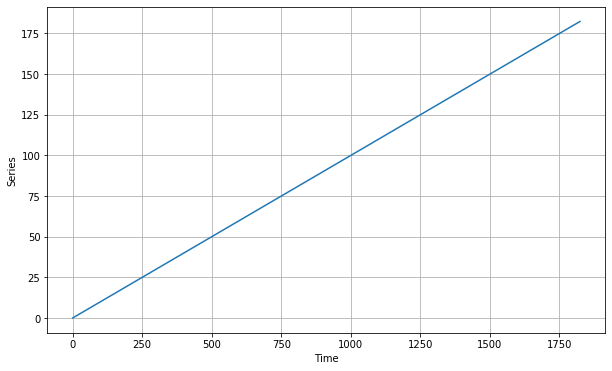

In [8]:
plot(time,series)

## Seasonality

In [9]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

<Figure size 720x432 with 0 Axes>

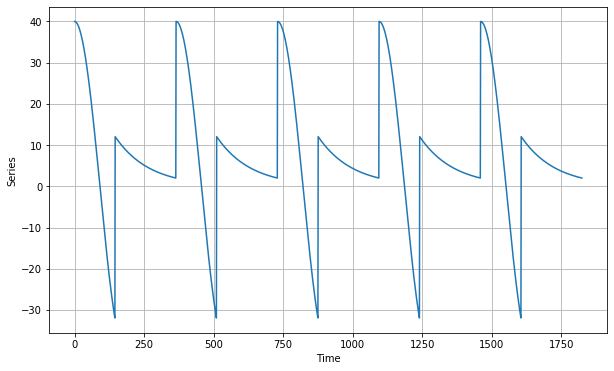

In [10]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot(time, series)
plt.show()

In [11]:
def trend (slope, time):
    return slope * time

<Figure size 720x432 with 0 Axes>

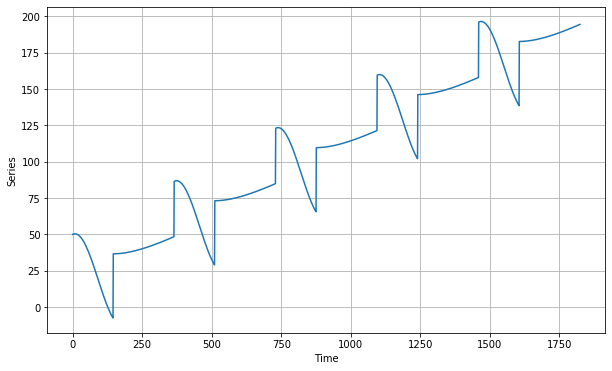

In [12]:
# Add slope to seasonality

baseline = 10
amplitude = 40
slope = 0.1
series = seasonality(time, period=365, amplitude=amplitude) + baseline  + trend(slope , time)


plt.figure(figsize=(10, 6))
plot(time, series)
plt.show()

# Noise

In [13]:
def white_noise(time, noise_level=1, seed=None):
    print (len(time))
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

1825


<Figure size 720x432 with 0 Axes>

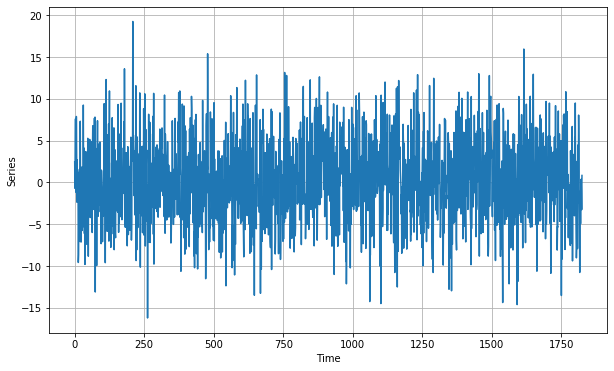

In [14]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot(time, noise)
plt.show()

<Figure size 720x432 with 0 Axes>

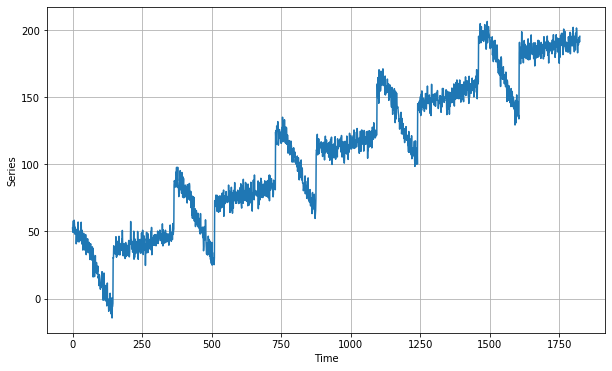

In [15]:
#time = np.arange(5*365 )
#slope = 0.1
#series = time * slope 

series = seasonality(time, period=365, amplitude=amplitude) + baseline  + trend(slope , time) + noise

plt.figure(figsize=(10, 6))
plot(time, series)
plt.show()

In [16]:
baseline = 10
amplitude = 40
#time = np.arange(365)
series = seasonality(time, period=365, amplitude=amplitude)


<Figure size 720x432 with 0 Axes>

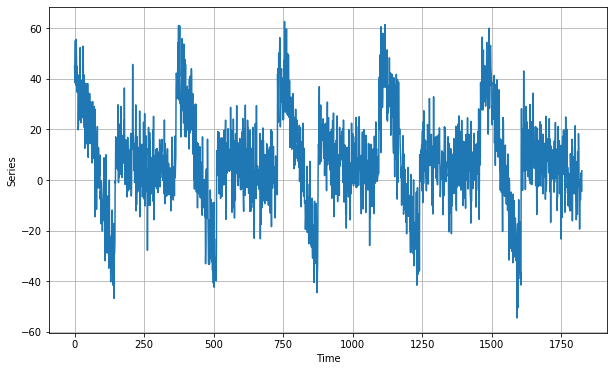

In [18]:
series += noise

plt.figure(figsize=(10, 6))
plot(time, series)
plt.show()

![image.png](./image/fixedPartitioning.png)

![image.png](./image/rollforwardPartitioning.png)

### Metrics for evaluating performance

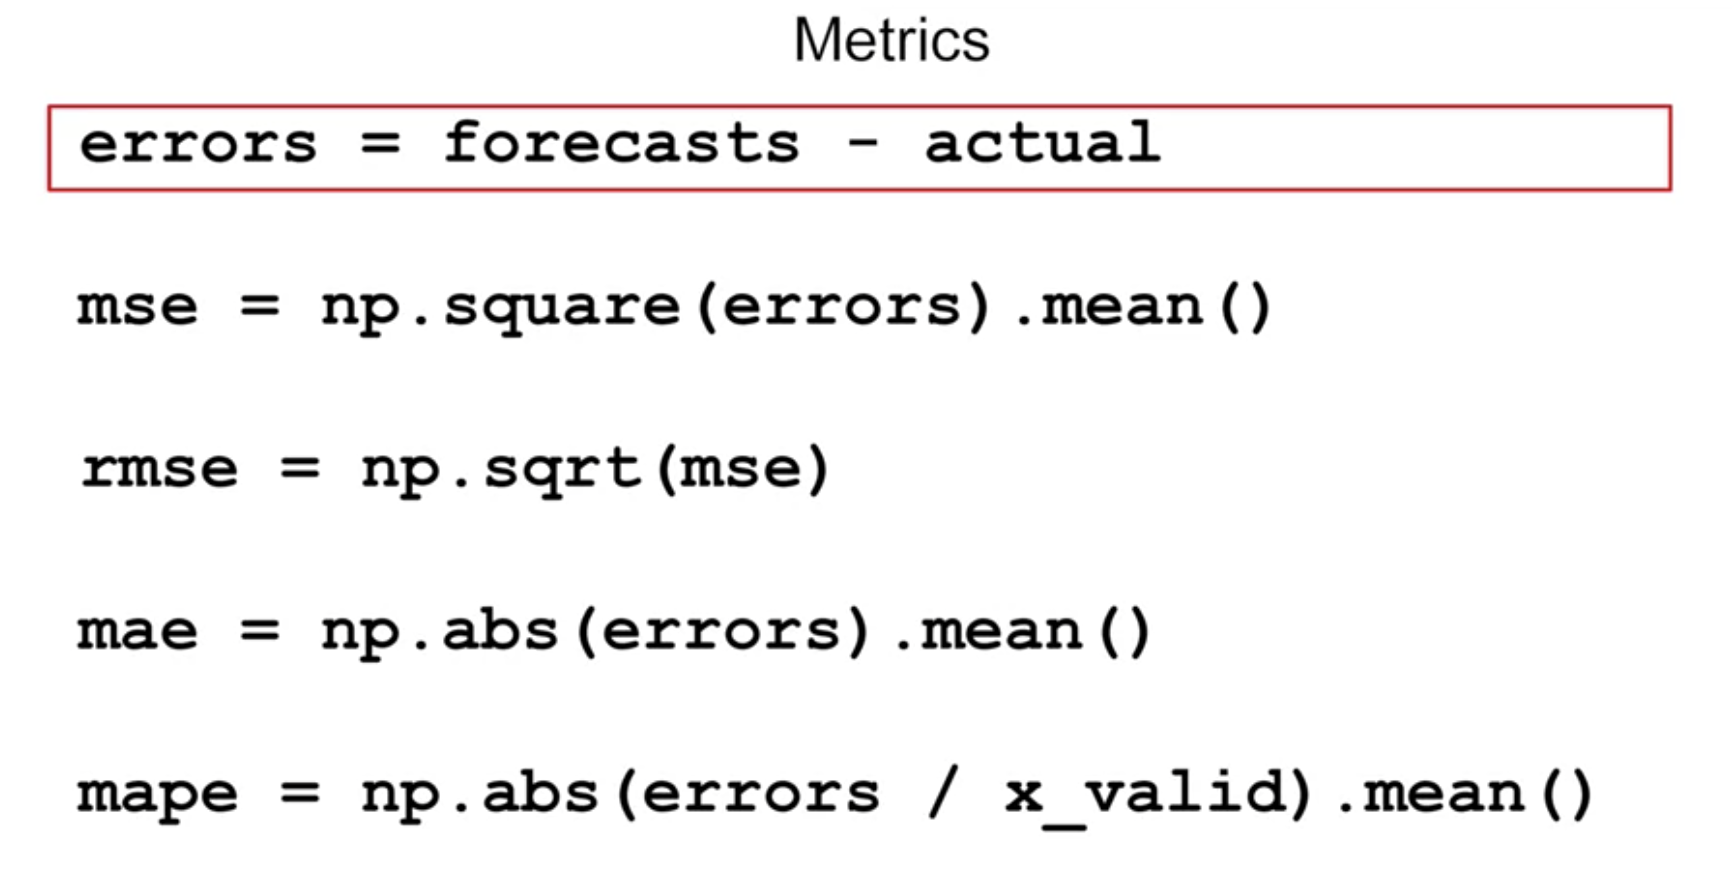


# Moving Average 

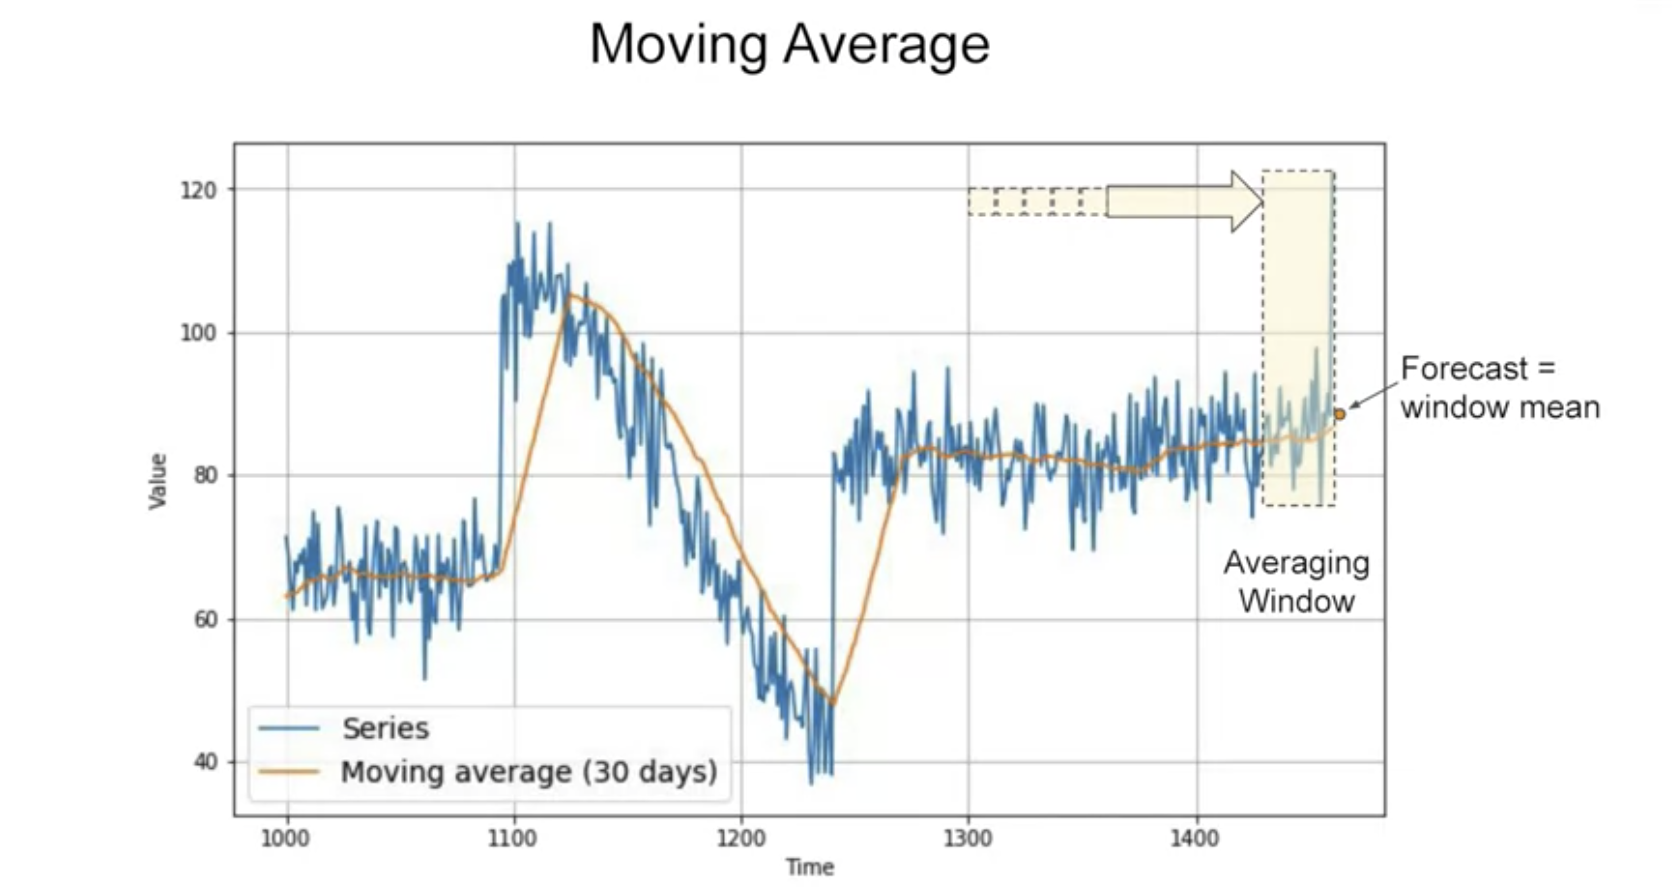

## Difference 
We remove the trend and the seasonailty from the time series 

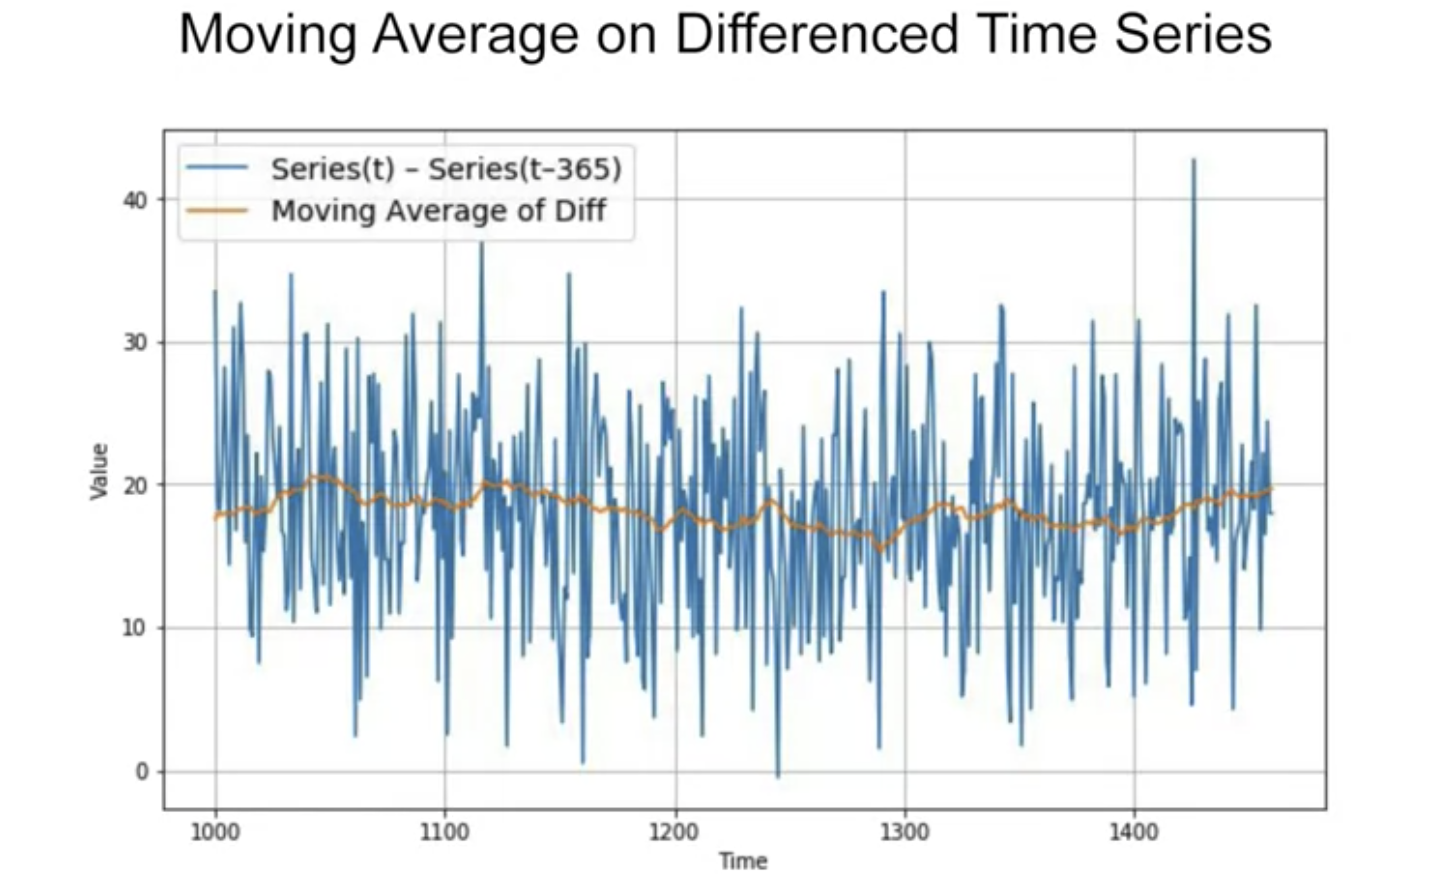